In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline


In [9]:
df = pd.read_csv("healthcare_dataset.csv")

In [10]:
df.head(10)

,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Cholesterol_Level,BMI,Diagnosis,Treatment_Plan,Follow_Up_Date
0,1,51,Female,97,90,282,35.2,Hypertension,Observation,2024-01-01
1,2,92,Other,129,80,169,32.3,Healthy,Medication,2024-01-02
2,3,14,Male,172,76,157,29.9,Diabetes,Observation,2024-01-03
3,4,71,Female,131,82,150,19.4,Coronary Artery Disease,Surgery,2024-01-04
4,5,60,Male,130,96,206,39.3,Diabetes,NaN,2024-01-05
5,6,20,Male,95,75,213,35.7,Healthy,Observation,2024-01-06
6,7,82,Female,141,65,267,24.8,Hypertension,NaN,2024-01-07
7,8,86,Male,115,67,177,39.6,Hyperlipidemia,Observation,2024-01-08
8,9,74,Other,153,84,270,31.4,Healthy,Surgery,2024-01-09
9,10,74,Male,148,77,256,31.0,Hypertension,Medication,2024-01-10


In [11]:
avg_age=df['Age'].mean()
avg_age

np.float64(48.874)

In [12]:
df.describe(
)

,Patient_ID,Age,Blood_Pressure,Heart_Rate,Cholesterol_Level,BMI
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,48.87400,133.024000,79.874000,225.806000,29.430400
std,144.481833,29.56983,25.665246,11.354293,44.964608,6.132838
min,1.000000,0.00000,90.000000,60.000000,150.000000,18.600000
25%,125.750000,23.00000,112.000000,70.750000,186.000000,24.100000
50%,250.500000,50.00000,132.000000,79.500000,226.000000,29.600000
75%,375.250000,72.25000,154.000000,90.000000,267.000000,34.725000
max,500.000000,99.00000,179.000000,99.000000,299.000000,40.000000


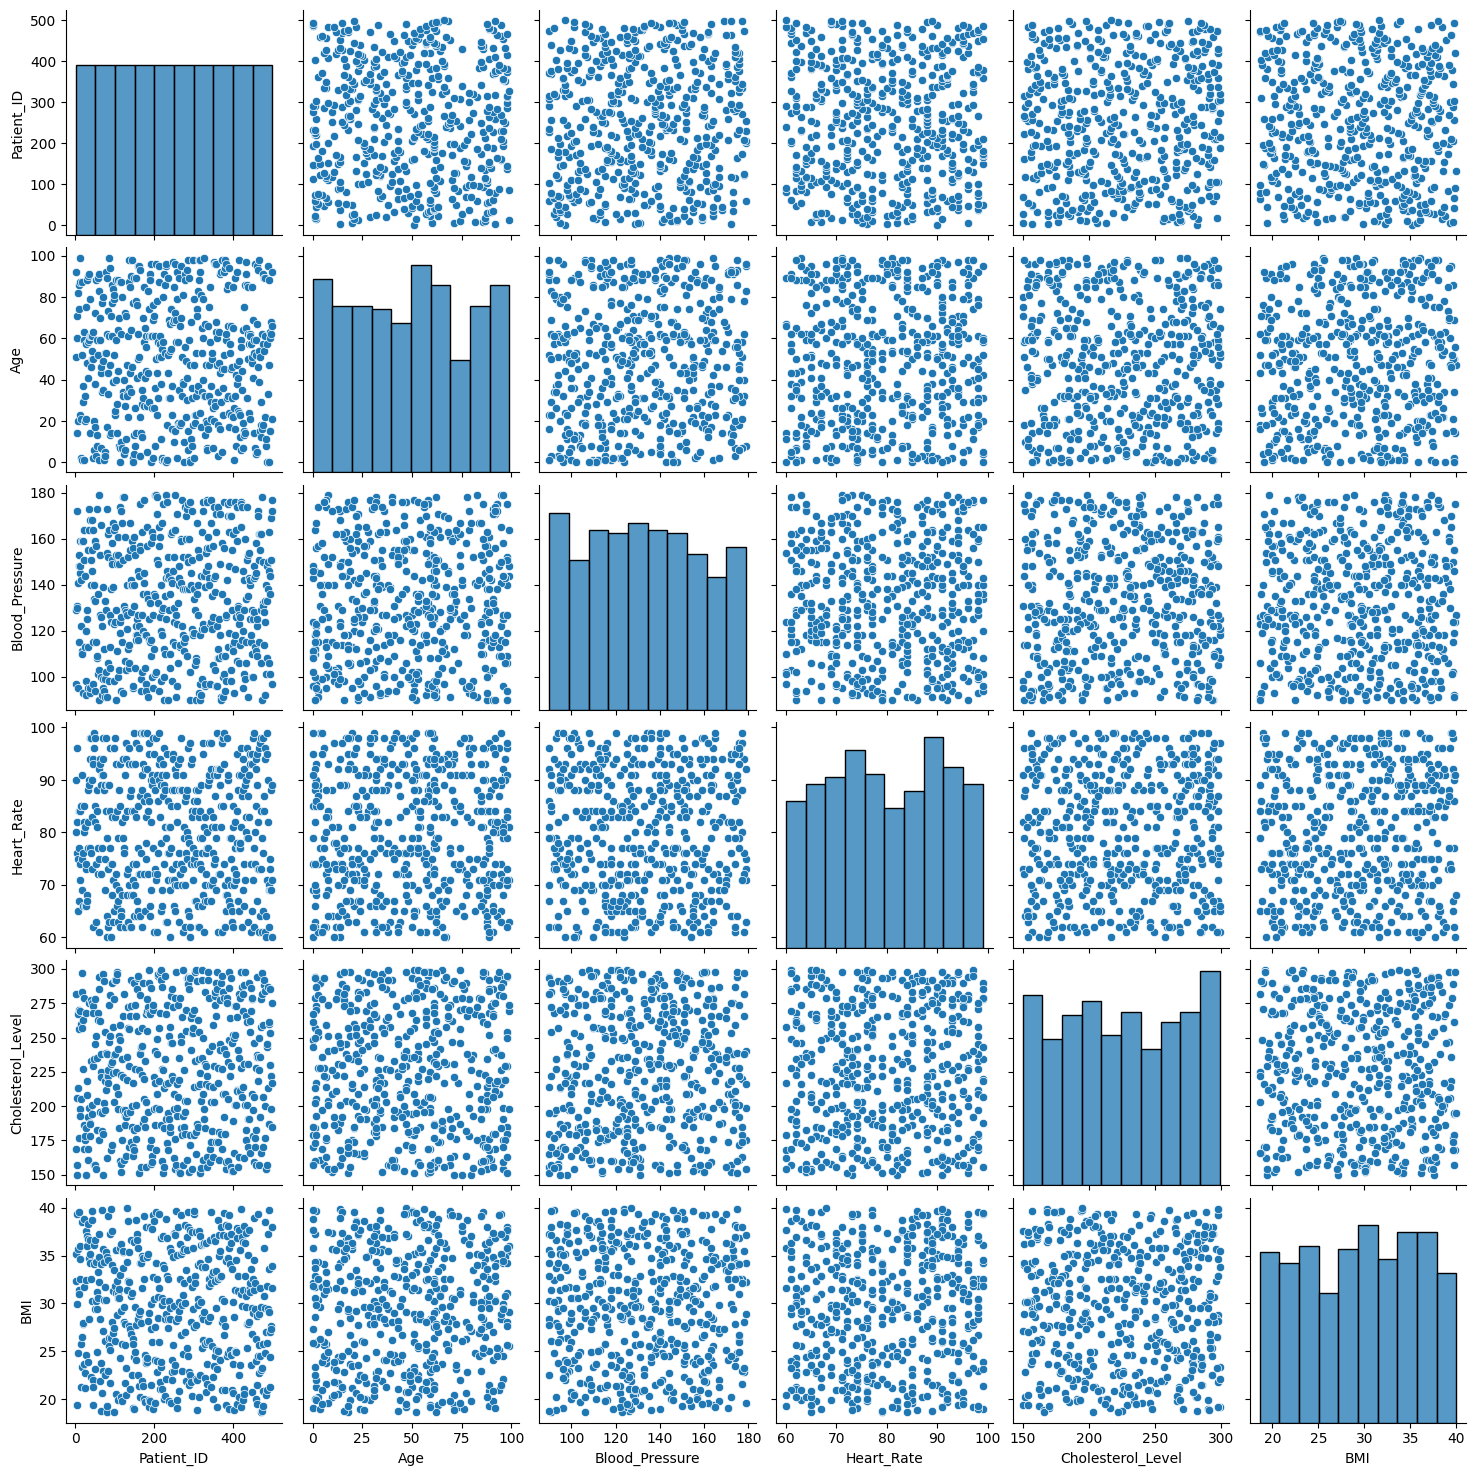

In [58]:
plt = sns.pairplot(df)
plt

In [65]:
plt=px.histogram(df, x="Age",marginal = 'box',nbins=50, title="Age vs Heart Rate")
plt.update_layout(bargap=0.3)
plt.show()

In [68]:
fig = px.scatter_3d(df, x='BMI', y='Age', z='Heart_Rate', color='Heart_Rate')
fig.show()

In [108]:
fig = px.scatter(df,x='Age',y='Cholesterol_Level',color='Treatment_Plan',opacity=1, title='Age vs Heart Rate')
fig.update_traces(marker_size=5)
fig.show()

In [96]:
fig = px.violin(df,x='Age',y='Cholesterol_Level')
fig.update_traces(marker_size=5)
fig.show()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("healthcare_dataset.csv")

# Features (drop BMI)
X = df.drop(columns=["BMI"])
# Target
y = df["BMI"]

# Handle categorical columns: one-hot encode if needed
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, pred))

RMSE: 44.67000239000001


In [106]:
# df.BMI.corr(df.Age)
# df.BMI.corr(df.Blood_Pressure)
df.Age.corr(df.Heart_Rate)
# df.BMI.corr(df.Cholesterol_Level)

np.float64(0.02886571983847751)

np.float64(-0.022437127965170653)

np.float64(0.0036481319099439464)